In [3]:
#Importing the necessary packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading Training dataset into dataframe
df= pd.read_csv('capstone_data/train.csv')

In [5]:
#DataFrame shape
df.shape

(1460, 81)

In [6]:
# First 5 rows in the DataFrame
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
# DataFrame Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Observations

From the above outputs, We could observe that,

1. The given dataset consists of total 81 columns i.e. features and a total of 1460 rows/ records for each feature.
2. There is rich blend of both the numerical and the categorical variables in the dataset.
3. Also, We observe that NULL/ NaN values are also present in the dataset.

### Identifying the numerical Variables

In [7]:
# Extracting the numerical variable names into a list
df_numerics_only = df.select_dtypes(include=np.number).columns.tolist()

len(df_numerics_only)


38

In [8]:
print(df_numerics_only)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


There ara a total of 38 features with numerical inputs in the dataset.
These features are listed above.

### Identifying the Categorical Variables

In [9]:
# Extracting the numerical variable names into a list
df_categorical_only = df.select_dtypes(include=np.object).columns.tolist()
len(df_categorical_only)

43

In [10]:
print(df_categorical_only)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


As seen above, there are a total of 43 categorical variables in the given dataset.


### Observation

In the above section, we performed the segregation of the features into numerical and categorical features.

We could confirm, that the data is almost equally divided amongst the two feature types, with numerical type having 38 features and categorical having 43 features. 

### Target Variable

"SalePrice" column (a numerical feature) would be our target variable.

Under this Project, our model would be trained at predicting the "SalePrice" of the house.

In the furher course of the project, we would find out the features that have a high impact on the "SalePrice" value and the relation(postive/ negative impact) between them .


## Independent Variables

### Handling the missing values

In [11]:
# Finding the total NULL entries per feature/ column
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

Above, We find out the number of NULL value entries present in the given dataset.
We would analyse the same using the heatmap below.

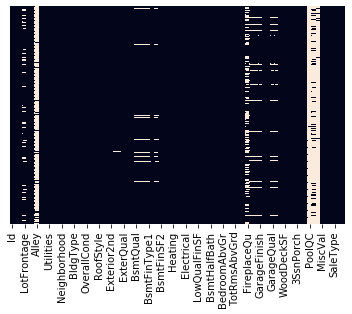

In [12]:
# Creating a heatmap plotting the NULL entries in the columns.
# The white bar represents the missing values.
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

### Observation

The white bars in the heatmap above, represents the NULL values that exist in the dataset.

And, and we could observe, the NULL values are spread across the dataset.

For some of the columns, the presence is low, however for few other columns, the majority of all entries are NULL values only.


### Plan to Handle the missing values

We followed the below approach in dealing with the missing values.

1. If the number of missing values exceed 50% of the total entries, then we drop the column altogether.
2. For columns containing categorical values, We replace the missing values with the mode value of the column.
3. For columns with numerical variables, replace the missing values with the median value of the column.


#### Columns where the missing values exceed 50% of the total entries.

In [13]:
# Dropping the Alley, PoolQC, Fence and MiscFeature columns.
df.drop(['Alley'],axis=1,inplace=True)
df.drop(['Id'],axis=1,inplace=True)
df.drop(['PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)


#### Handling missing values for the numerical features


In [14]:
# Replace NULL values with mean value for the column
df['LotFrontage']= df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea']= df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

#### Handling missing values for the categorical features


In [15]:
# Replace NULL values with mode value of the column
df['FireplaceQu']= df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['BsmtQual']= df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']= df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure']= df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']= df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']= df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['MasVnrType']= df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['GarageType']= df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt']= df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['GarageFinish']= df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']= df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']= df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['Electrical']= df['Electrical'].fillna(df['Electrical'].mode()[0])


#### NULL value removal verification

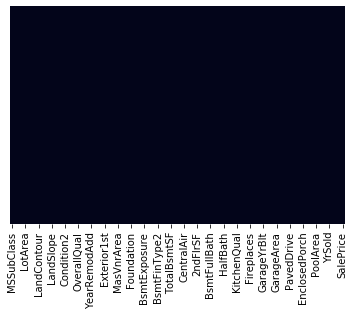

In [16]:
# Creating a heatmap plotting the NULL entries in the columns.
# The white bar represents the missing values.

sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

### Observation

As observed from the heatmap above, we are unable to find any trace of white bar (indicating presence of the NULL values).

This suggests that all the NULL values in the dataset have been properly addressed.

### Analysing the Numerical Variables